# eNATL60, LLC4320, drifter kinetic energies in spectral space

In [11]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# drifter diagnostics: XY
d_files = ['E_drifter_zonal_mean_NA.zarr', 'E_drifter_uv_domain_average_NA.zarr', 
           'E_drifter_each_band_NA.zarr']

D = [xr.open_zarr('Drifter_North_Atlantic/'+f).drop('freq_time').rename({'freq_cpd':'freq_time'}) for f in d_files[:2]]

ds_dr = (xr.merge(D+[xr.open_zarr('Drifter_North_Atlantic/'+d_files[2])])
         .chunk({'lat_bins':None}) ).sortby('freq_time')

# rescale: m/s -> cm/s  + cps to cpd ?
ds_dr['E_uv_zonal_mean'] = ds_dr.E_uv_zonal_mean/8.64

print(ds_dr)

<xarray.Dataset>
Dimensions:            (freq_time: 1440, lat_bins: 121)
Coordinates:
  * freq_time          (freq_time) float64 dask.array<shape=(1440,), chunksize=(1440,)>
    freq_time_spacing  float64 1.929e-07
  * lat_bins           (lat_bins) int64 -60 -59 -58 -57 -56 ... 56 57 58 59 60
Data variables:
    E_uv_zonal_mean    (lat_bins, freq_time) float64 dask.array<shape=(121, 1440), chunksize=(121, 720)>
    E_uv_domain_mean   (freq_time) float64 dask.array<shape=(1440,), chunksize=(1440,)>
    E_diurnal          (lat_bins) float64 dask.array<shape=(121,), chunksize=(121,)>
    E_f                (lat_bins) float64 dask.array<shape=(121,), chunksize=(121,)>
    E_high             (lat_bins) float64 dask.array<shape=(121,), chunksize=(121,)>
    E_low              (lat_bins) float64 dask.array<shape=(121,), chunksize=(121,)>
    E_semi             (lat_bins) float64 dask.array<shape=(121,), chunksize=(121,)>
    E_total            (lat_bins) float64 dask.array<shape=(121,), chunk

In [39]:
# eNATL60
ds_enatl60 = xr.open_zarr('enatl60_E_UV_stats.zarr')
ds_enatl60 = ds_enatl60.where(np.abs(ds_enatl60.freq_time)>0)
print(ds_enatl60)

# LLC4320
ds_llc4320 = xr.open_zarr('llc4320_E_UV_stats.zarr')
ds_llc4320 = ds_llc4320.where(np.abs(ds_llc4320.freq_time)>0)

<xarray.Dataset>
Dimensions:       (freq_time: 1440, lat_bins: 64)
Coordinates:
  * freq_time     (freq_time) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins      (lat_bins) float64 0.5 1.5 2.5 3.5 4.5 ... 60.5 61.5 62.5 63.5
Data variables:
    E_global      (freq_time) float64 dask.array<shape=(1440,), chunksize=(1440,)>
    E_global_noA  (freq_time) float64 dask.array<shape=(1440,), chunksize=(1440,)>
    E_zav         (freq_time, lat_bins) float64 dask.array<shape=(1440, 64), chunksize=(1440, 64)>


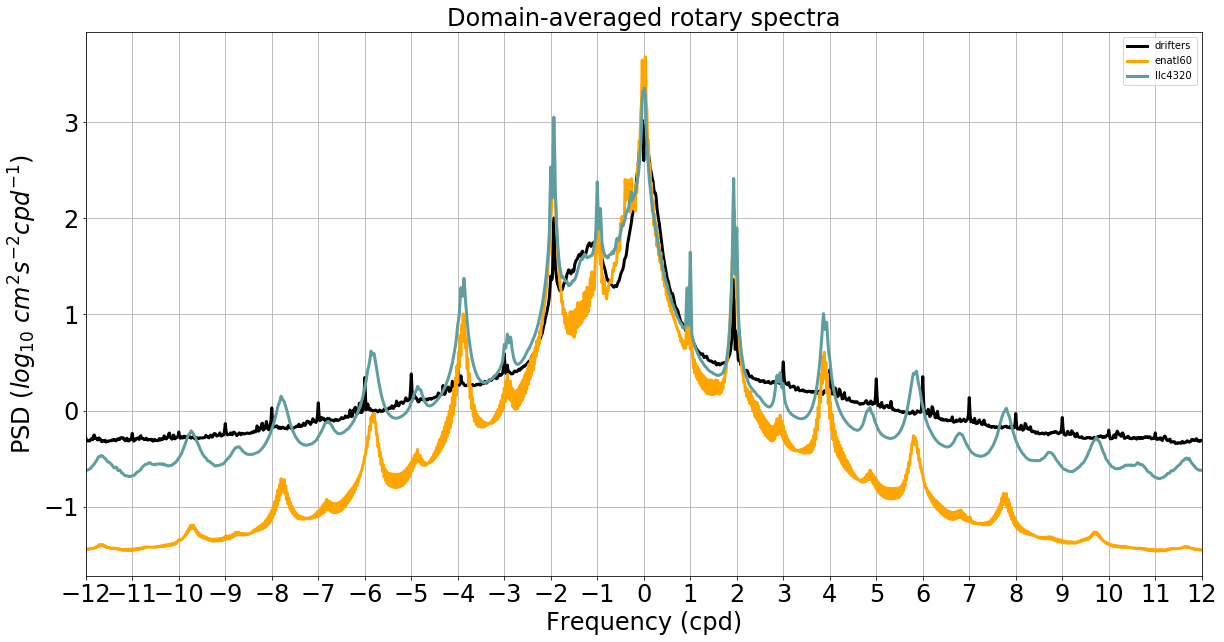

In [40]:
fig, ax = plt.subplots(figsize=(20,10))

ax = plt.subplot(1,1,1)
np.log10(ds_dr.E_uv_domain_mean).plot(ax=ax, linewidth=3, color='black', label='drifters')
np.log10(ds_enatl60.E_global*1e4).plot(ax=ax, linewidth=3, color='orange', label='enatl60')
np.log10(ds_llc4320.E_global*1e4).plot(ax=ax, linewidth=3, color='cadetblue', label='llc4320')
ax.grid()
#ax.set_ylim([-0.5,3.5])
#ax.set_yticks(np.arange[-0.5,0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5])
ax.set_xlim([-12.,12.])
ax.set_xticks(np.arange(-12,13))
ax.set_ylabel('PSD ($log_{10}\ cm^2 s^{-2} cpd^{-1})$',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)
ax.set_title('Domain-averaged rotary spectra',fontsize=24)
ax.legend()

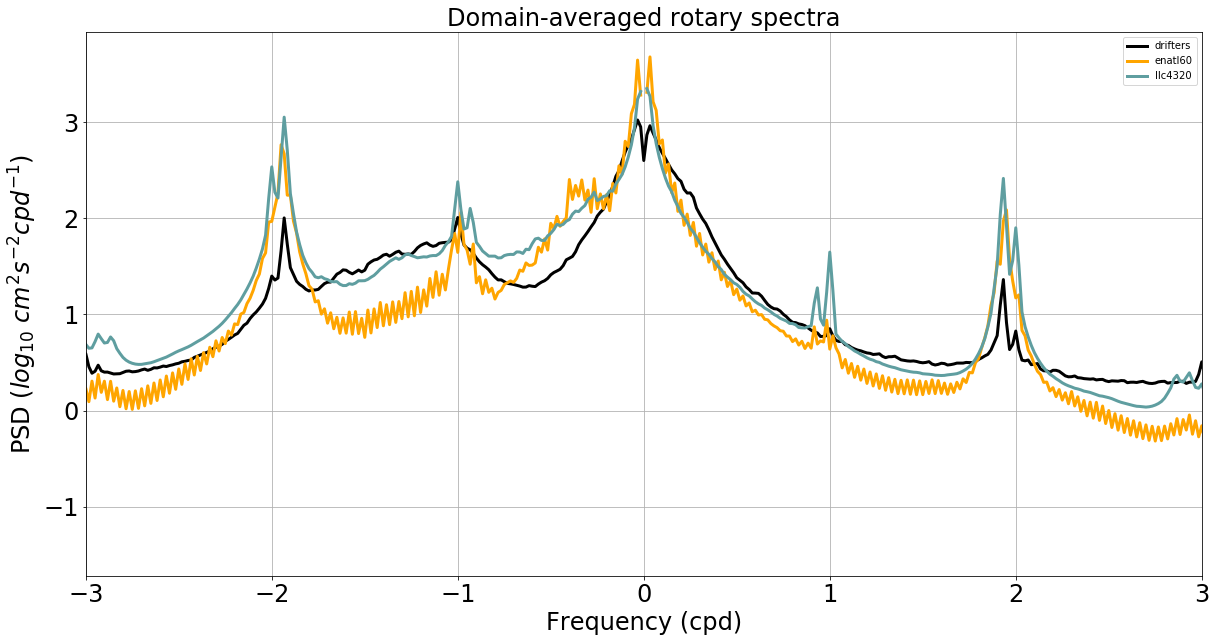

In [41]:
fig, ax = plt.subplots(figsize=(20,10))

ax = plt.subplot(1,1,1)
np.log10(ds_dr.E_uv_domain_mean).plot(ax=ax, linewidth=3, color='black', label='drifters')
np.log10(ds_enatl60.E_global*1e4).plot(ax=ax, linewidth=3, color='orange', label='enatl60')
np.log10(ds_llc4320.E_global*1e4).plot(ax=ax, linewidth=3, color='cadetblue', label='llc4320')
ax.grid()
#ax.set_ylim([-0.5,3.5])
#ax.set_yticks(np.arange[-0.5,0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5])
ax.set_xlim([-3.,3.])
#ax.set_xticks(np.arange(-12,13))
ax.set_ylabel('PSD ($log_{10}\ cm^2 s^{-2} cpd^{-1})$',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)
ax.set_title('Domain-averaged rotary spectra',fontsize=24)
ax.legend()

---

## zonally averaged spectra

In [42]:
def plot_zonav_spectrum(E):

    plt.figure(figsize=(20,10))
    ax = plt.subplot(1,1,1)

    cax = np.log10(E).plot.pcolormesh(ax=ax, vmin=-0.5, vmax=4, 
                                      x='freq_time', y='lat_bins', cmap = 'Spectral_r', 
                                      add_colorbar = False)

    # colorbar
    cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
    cbar.ax.tick_params(labelsize=24)
    cbar.set_label('PSD ($log_{10} cm^2 s^{-2} cpd^{-1})$', fontsize=24)

    # x,y ticks
    #ax.set_xticks([-12., -10., -8., -6., -4., -2., 0, 2., 4., 6., 8., 10., 12.])
    ax.set_xticks(list(ax.get_xticks()) + [-4., -3., -2., -1., 1., 2., 3., 4.])
    #ax.set_xlim(-12., 12.)
    ax.set_xlim(-5., 5.)
    ax.set_ylim(7., 60.)
    ax.set_yticks([10., 20., 30, 40., 50, 60.])
    ax.set_yticklabels(['10N','20N','30N','40N','50N','60N'])
    ax.set_ylabel('Latitude',fontsize=24)
    ax.set_xlabel('Frequency (cpd)',fontsize=24)
    ax.tick_params(labelsize=24)

    # add coriolis frequency
    f_drifter = 2.*2.*np.pi/86400. * np.sin(np.deg2rad(E.lat_bins))
    ax.plot(f_drifter*86400./2./np.pi,f_drifter.lat_bins,'w--')
    ax.plot(-f_drifter*86400./2./np.pi,f_drifter.lat_bins,'k--')
    ax.set_title('Drifter (North Atlantic)',fontsize=24)


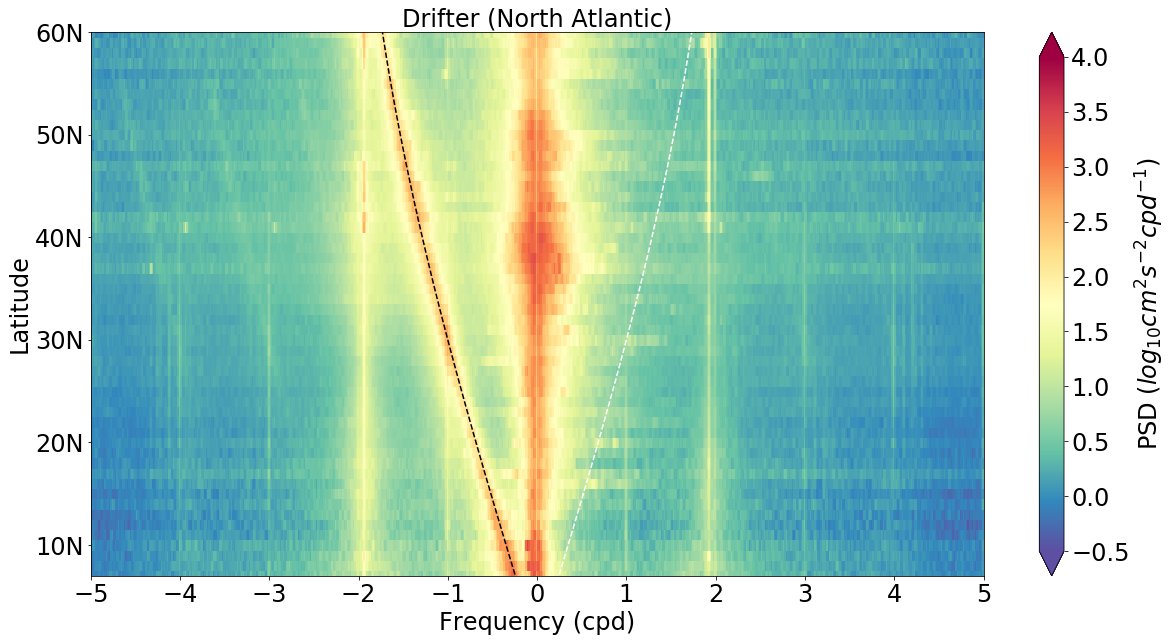

In [44]:
plot_zonav_spectrum(ds_dr.E_uv_zonal_mean)

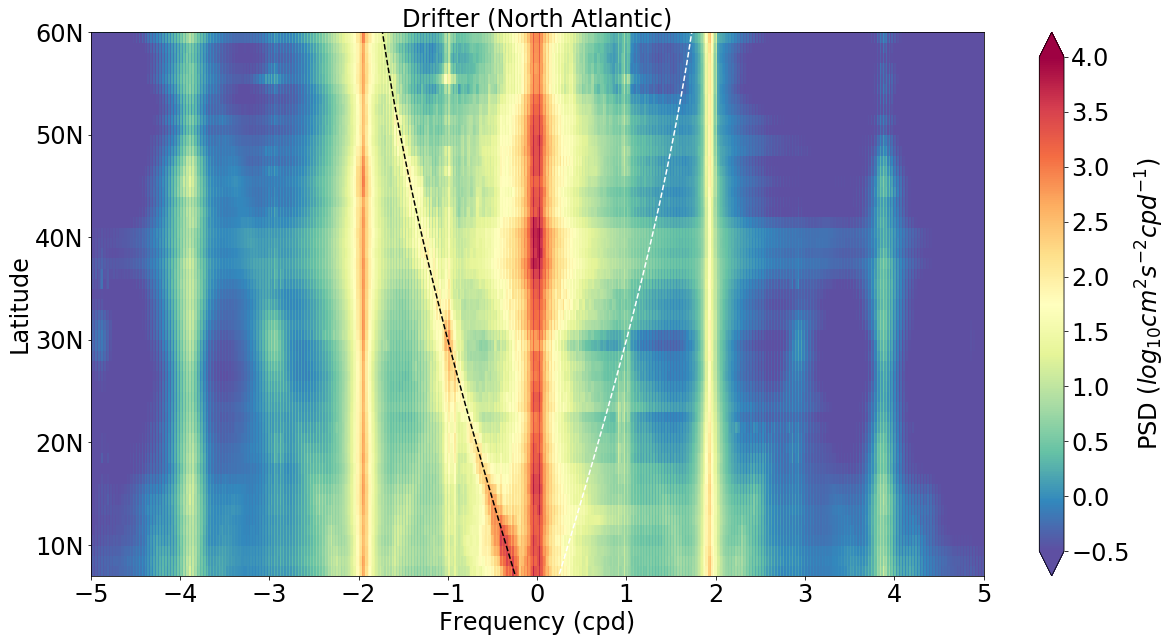

In [46]:
plot_zonav_spectrum(ds_enatl60.E_zav*1e4)

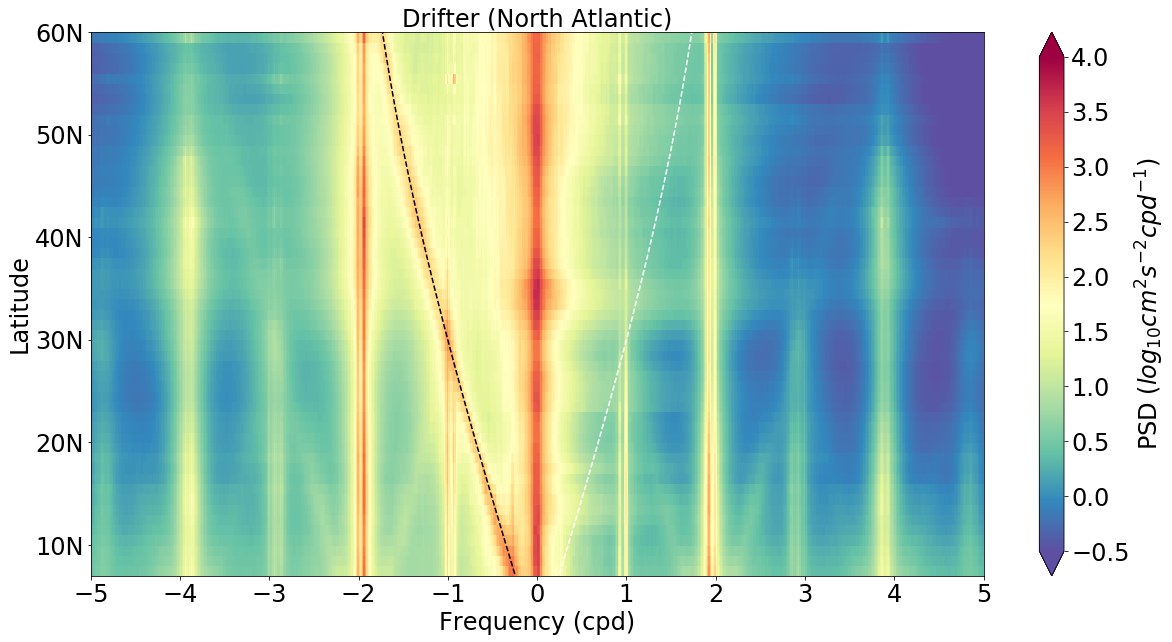

In [47]:
plot_zonav_spectrum(ds_llc4320.E_zav*1e4)